## Import Library

In [45]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

## Data Wrangling

### Gathering Data

In [46]:
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [47]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

In [48]:
with engine.connect() as conn:
    print("Koneksi berhasil!")

Koneksi berhasil!


In [49]:
data_sales = pd.read_sql("SELECT * FROM sales", engine)

In [50]:
data_sales.head()

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,None,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


### Assessing Data

In [51]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   order_date          1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [52]:
data_sales.describe(include='all')

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,893,1000,1000
unique,NaN,348,7,2,NaN,NaN,NaN,2,2,5
top,NaN,2022-05-09,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,8,161,686,NaN,NaN,NaN,476,512,205
mean,500.500000,NaN,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,14.921744,4.413075,204.402979,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN


In [53]:
data_sales.isna().sum()

order_id                0
order_date              0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [54]:
data_sales.duplicated().sum()

np.int64(0)

### Cleaning Data

In [55]:
data_sales["transaction_type"] = data_sales["transaction_type"].fillna("Unknown")
data_sales["item_name"] = data_sales["item_name"].str.strip()
data_sales["item_type"] = data_sales["item_type"].str.strip()

## Exploratory Data Analysis

In [56]:
data_sales.describe(include='all')

,order_id,order_date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
count,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,348,7,2,NaN,NaN,NaN,3,2,5
top,NaN,2022-05-09,Cold coffee,Fastfood,NaN,NaN,NaN,Cash,Mr.,Night
freq,NaN,8,161,686,NaN,NaN,NaN,476,512,205
mean,500.500000,NaN,NaN,NaN,33.315000,8.162000,275.230000,NaN,NaN,NaN
std,288.819436,NaN,NaN,NaN,14.921744,4.413075,204.402979,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,20.000000,1.000000,20.000000,NaN,NaN,NaN
25%,250.750000,NaN,NaN,NaN,20.000000,4.000000,120.000000,NaN,NaN,NaN
50%,500.500000,NaN,NaN,NaN,25.000000,8.000000,240.000000,NaN,NaN,NaN
75%,750.250000,NaN,NaN,NaN,50.000000,12.000000,360.000000,NaN,NaN,NaN


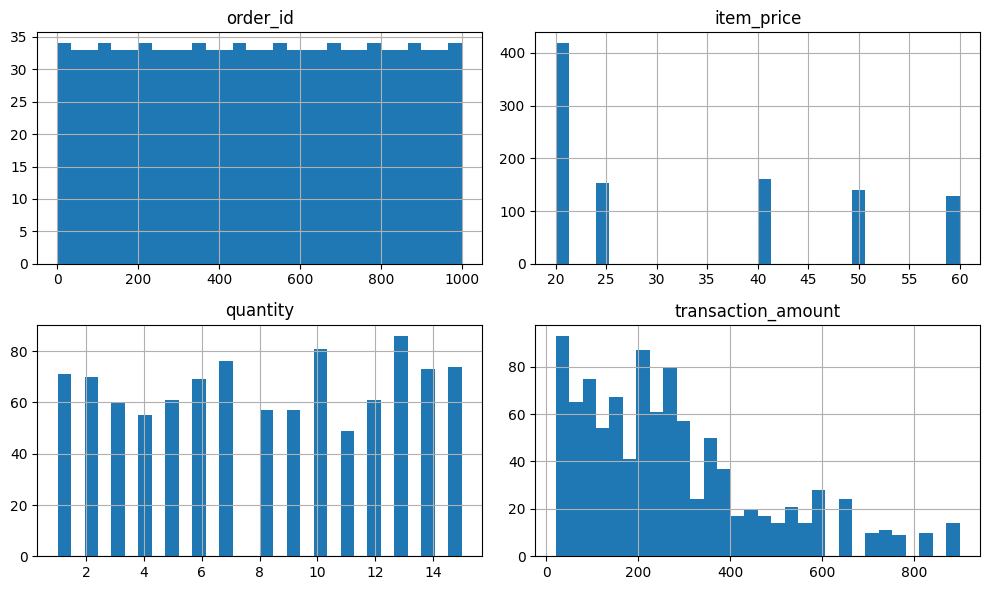

In [57]:
data_sales.hist(figsize=(10, 6), bins=30)
plt.tight_layout()
plt.show()

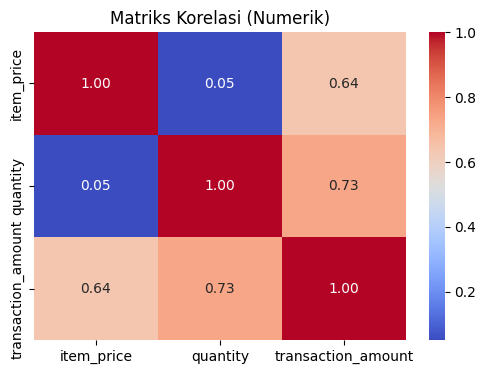

In [58]:
numerical_categories = ["item_price", "quantity", "transaction_amount"]
correlation_matrix = data_sales[numerical_categories].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi (Numerik)")
plt.show()

In [59]:
data_sales["transaction_amount"].sum()

np.int64(275230)

In [60]:
data_sales["order_id"].nunique()

1000

In [61]:
data_sales["item_name"].nunique()

7

In [62]:
data_sales.groupby("item_name")["transaction_amount"].sum().sort_values(ascending=False)

item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Aalopuri           20880
Vadapav            20120
Name: transaction_amount, dtype: int64

In [63]:
data_sales.groupby("item_name")["transaction_amount"].mean()

item_name
Aalopuri           155.820896
Cold coffee        338.136646
Frankie            413.669065
Panipuri           163.466667
Sandwich           510.232558
Sugarcane juice    208.823529
Vadapav            150.149254
Name: transaction_amount, dtype: float64

In [64]:
data_sales.to_excel('../data-cleaned/sales.xlsx',index=False)